# Assignment 1
## Basic Hebbian Learning

In [119]:
import numpy as np
from matplotlib import pyplot as plt

In [120]:
#1) Load dataset
uu = np.loadtxt("../dataset2_lab_2_1.csv", delimiter=",", unpack=True)
print(uu)

[[  12.  3504. ]
 [  11.5 3693. ]
 [  11.  3436. ]
 [  12.  3433. ]
 [  10.5 3449. ]
 [  10.  4341. ]
 [   9.  4354. ]
 [   8.5 4312. ]
 [  10.  4425. ]
 [   8.5 3850. ]
 [  17.5 3090. ]
 [  11.5 4142. ]
 [  11.  4034. ]
 [  10.5 4166. ]
 [  11.  3850. ]
 [  10.  3563. ]
 [   8.  3609. ]
 [   8.  3353. ]
 [   9.5 3761. ]
 [  10.  3086. ]
 [  15.  2372. ]
 [  15.5 2833. ]
 [  15.5 2774. ]
 [  16.  2587. ]
 [  14.5 2130. ]
 [  20.5 1835. ]
 [  17.5 2672. ]
 [  14.5 2430. ]
 [  17.5 2375. ]
 [  12.5 2234. ]
 [  15.  2648. ]
 [  14.  4615. ]
 [  15.  4376. ]
 [  13.5 4382. ]
 [  18.5 4732. ]
 [  14.5 2130. ]
 [  15.5 2264. ]
 [  14.  2228. ]
 [  19.  2046. ]
 [  20.  1978. ]
 [  13.  2634. ]
 [  15.5 3439. ]
 [  15.5 3329. ]
 [  15.5 3302. ]
 [  15.5 3288. ]
 [  12.  4209. ]
 [  11.5 4464. ]
 [  13.5 4154. ]
 [  13.  4096. ]
 [  11.5 4955. ]
 [  12.  4746. ]
 [  12.  5140. ]
 [  13.5 2962. ]
 [  19.  2408. ]
 [  15.  3282. ]
 [  14.5 3139. ]
 [  14.  2220. ]
 [  14.  2123. ]
 [  19.5 2074.

In [121]:
u = uu / np.linalg.norm(uu)
print(u)

[[0.00019229 0.05614722]
 [0.00018427 0.05917571]
 [0.00017626 0.05505761]
 [0.00019229 0.05500954]
 [0.00016825 0.05526592]
 [0.00016024 0.0695591 ]
 [0.00014421 0.06976741]
 [0.0001362  0.06909441]
 [0.00016024 0.0709051 ]
 [0.0001362  0.06169144]
 [0.00028042 0.04951339]
 [0.00018427 0.06637038]
 [0.00017626 0.06463981]
 [0.00016825 0.06675495]
 [0.00017626 0.06169144]
 [0.00016024 0.05709262]
 [0.00012819 0.05782972]
 [0.00012819 0.05372764]
 [0.00015223 0.06026533]
 [0.00016024 0.0494493 ]
 [0.00024036 0.03800834]
 [0.00024837 0.04539529]
 [0.00024837 0.04444989]
 [0.00025638 0.04145344]
 [0.00023234 0.03413059]
 [0.00032849 0.02940358]
 [0.00028042 0.04281546]
 [0.00023234 0.03893771]
 [0.00028042 0.03805641]
 [0.0002003  0.03579706]
 [0.00024036 0.04243089]
 [0.00022433 0.07394961]
 [0.00024036 0.07011993]
 [0.00021632 0.07021608]
 [0.00029644 0.07582439]
 [0.00023234 0.03413059]
 [0.00024837 0.03627777]
 [0.00022433 0.03570092]
 [0.00030445 0.03278459]
 [0.00032048 0.03169498]


In [122]:
'''
u[:,1] = u[:,1]- np.mean(u[:,1])
u[:,0] = u[:,0]- np.mean(u[:,0])
print(u)
'''

'\nu[:,1] = u[:,1]- np.mean(u[:,1])\nu[:,0] = u[:,0]- np.mean(u[:,0])\nprint(u)\n'

In [123]:
#2) Implement a linear firing rate model
def linear_model(u,w):
    return np.dot(u,w)

In [124]:
#3) Implement Basic Hebb Rule
name = 'Basic Hebbian Rule'
#randomly initialized wheight vector, from a uniform distribution [-1,1]
w = np.random.rand(2)*2 - 1 

#parameters
eta = 0.01
threshold = 1e-3
epochs = 1000

#to keep track of evolution of w during training
w_hist = w
wold = w

for N in range (epochs):


    if N % (epochs/10) == 0:
        print(f"Epoch {N} of {epochs}")

    #shuffle the input dataset
    uu = np.random.permutation(u)  

    for i in range (len(uu)):
        #Compute output
        v = linear_model(uu[i], w)
        #Hebbian rule
        w = w + eta*v*uu[i]

        w_hist = np.vstack((w_hist, w))
    
    #stop learning if w stabilizes
    if np.linalg.norm(w-wold) < threshold:
        print(f"Stopped at epoch {N} because of w convergence")
        break
    #to prevent overflow:
    if np.linalg.norm(w) > 1e10:
       print(f"Stopped at epoch {N} to prevent overflow")
       break
    wold = w

print('Training finished')

Epoch 0 of 1000
Epoch 100 of 1000
Epoch 200 of 1000
Epoch 300 of 1000
Epoch 400 of 1000
Epoch 500 of 1000
Epoch 600 of 1000
Epoch 700 of 1000
Epoch 800 of 1000
Epoch 900 of 1000
Training finished


406001
406001


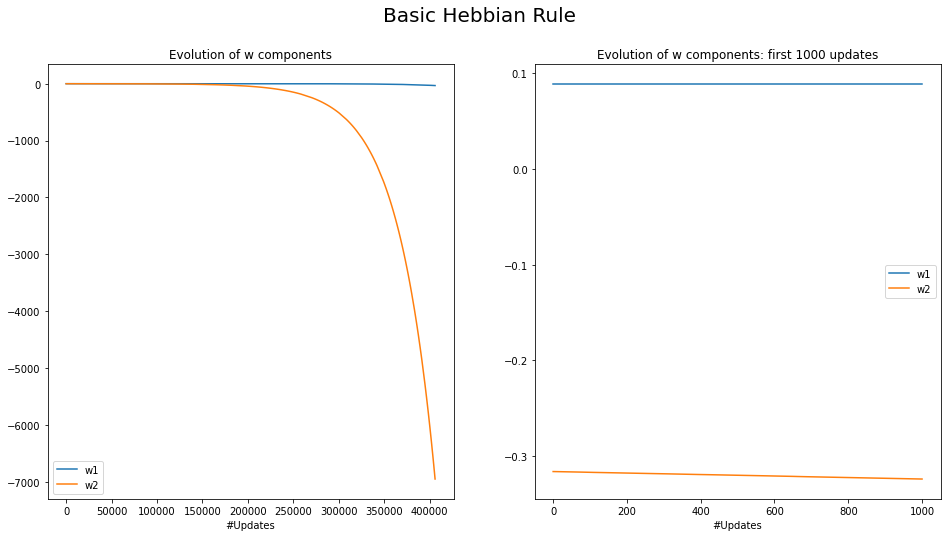

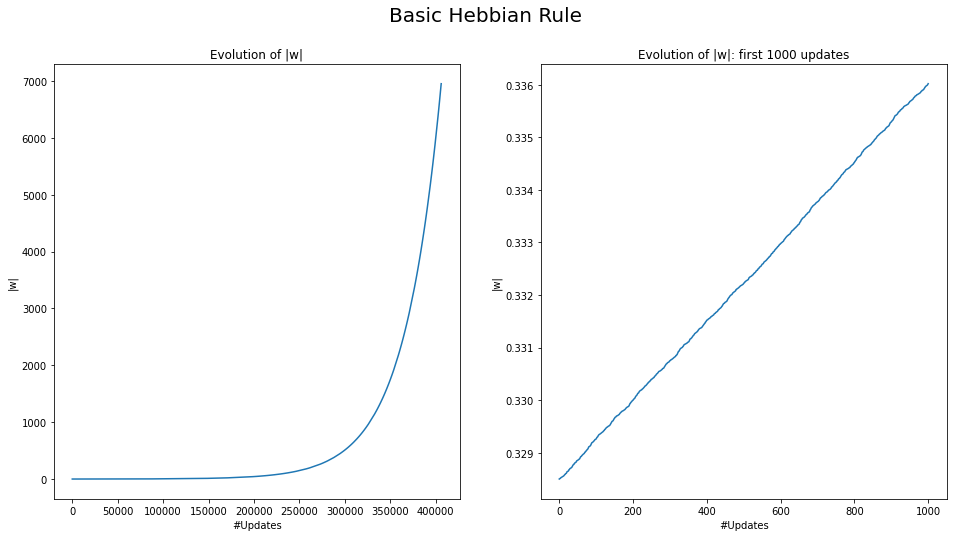

In [125]:
#plot P2
w1 = (np.transpose(w_hist))[0]
w2 = (np.transpose(w_hist))[1]
w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))

plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)

ax1 = plt.subplot(1,2,1)
plt.title('Evolution of w components')
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
ax1.set_xlabel('#Updates')
plt.legend()

ax2 = plt.subplot(1,2,2)
xmax = min(1000,len(t))
plt.title(f'Evolution of w components: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w1[mask], label='w1')
plt.plot(t[mask], w2[mask], label='w2')
plt.legend()
ax2.set_xlabel('#Updates')

plt.savefig('P2' + name + '_w_evolution',format='pdf')


plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)
ax1 = plt.subplot(1,2,1)
plt.title('Evolution of |w|')
ax1.set_ylabel('|w|')
ax1.set_xlabel('#Updates')
plt.plot(t, w_norm)



print(len(w_norm))
print(len(t))
ax2 = plt.subplot(1,2,2)
xmax = min(1000,len(t))
plt.title(f'Evolution of |w|: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w_norm[mask])
ax2.set_ylabel('|w|')
ax2.set_xlabel('#Updates')

plt.savefig('P2' + name + '_w_norm_evolution',format='pdf')


plt.show()

In [126]:
#Compute correlation matrix
Q = np.array([[0,0], [0,0]])
for i in range (len(u)):
     Q = Q + np.outer(u[i],u[i])
Q = Q/len(u)

print('Correlation matrix:\n',Q)

#Compute eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(Q)

#Principal eigenvector
max_eigvect = eig_vec[:,np.argmax(eig_val)]
print('\nMax eigvect:\n',max_eigvect)

Correlation matrix:
 [[6.38565366e-08 1.16109494e-05]
 [1.16109494e-05 2.46299033e-03]]

Max eigvect:
 [-0.00471413 -0.99998889]


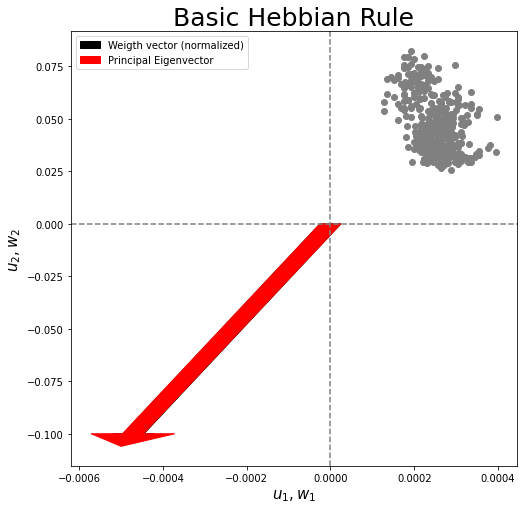

In [127]:
#P1
plt.figure(figsize=(8, 8))
plt.title(name, fontsize = 25)
#plot x,y axis
plt.axhline(y=0, color='grey', linestyle = '--')
plt.axvline(x=0, color='grey', linestyle = '--')

#plot inputs
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]
plt.scatter(u1,u2, color= 'grey')

#normalized weigth vector
plt.arrow(0,0, 0.1*w[0]/np.linalg.norm(w), 0.1*w[1]/np.linalg.norm(w) , width=0.00005, head_width=0.0001, head_length=0.0015, label='Weigth vector (normalized)', color = 'black')

#principal eigenvector
plt.arrow(0,0, max_eigvect[0]/10, max_eigvect[1]/10 , width=0.00005, head_width=0.0002, head_length=0.006, label='Principal Eigenvector', color = 'red')
plt.xlabel('$u_1, w_1$', fontsize=15)
plt.ylabel('$u_2, w_2$', fontsize=15)
plt.legend()

plt.savefig('P1' + name,format='pdf')
plt.show()

# Assignment 2
## Oja Rule

In [128]:
# Implement Oja Rule
name = 'Oja Rule'
#randomly initialized wheight vector, from a uniform distribution [-1,1]
w = np.random.rand(2)*2 - 1 

#parameters
alpha= 0.05
eta = 0.01
threshold = 1e-3
epochs = 1000

#to keep track of evolution of w during training
w_hist = w
wold = w

for N in range (epochs):

    if N % (epochs/10) == 0:
        print(f"Epoch {N} of {epochs}")

    #shuffle the input dataset
    uu = np.random.permutation(u)  

    for i in range (len(uu)):
        #Compute output
        v = linear_model(uu[i], w)
        #Oja rule
        w = w + eta*v*uu[i] - alpha*eta*(v**2)*w

        w_hist = np.vstack((w_hist, w))
    
    #stop learning if w stabilizes
    if np.linalg.norm(w-wold) < threshold:
        print(f"Stopped at epoch {N} because of w convergence")
        break
    #to prevent overflow:
    if np.linalg.norm(w) > 1e50:
       print(f"Stopped at epoch {N} to prevent overflow")
       break
    wold = w

print('Training finished')

Epoch 0 of 1000
Epoch 100 of 1000
Epoch 200 of 1000
Epoch 300 of 1000
Stopped at epoch 362 because of w convergence
Training finished


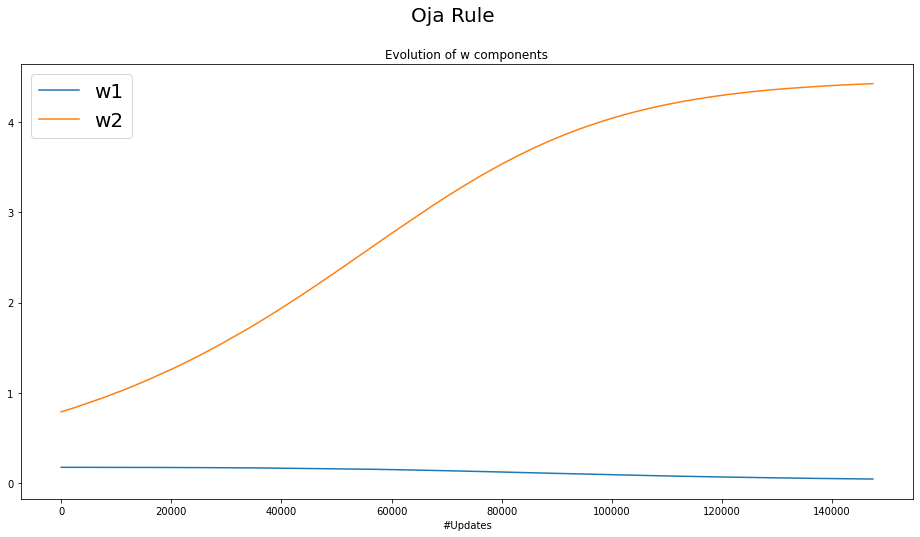

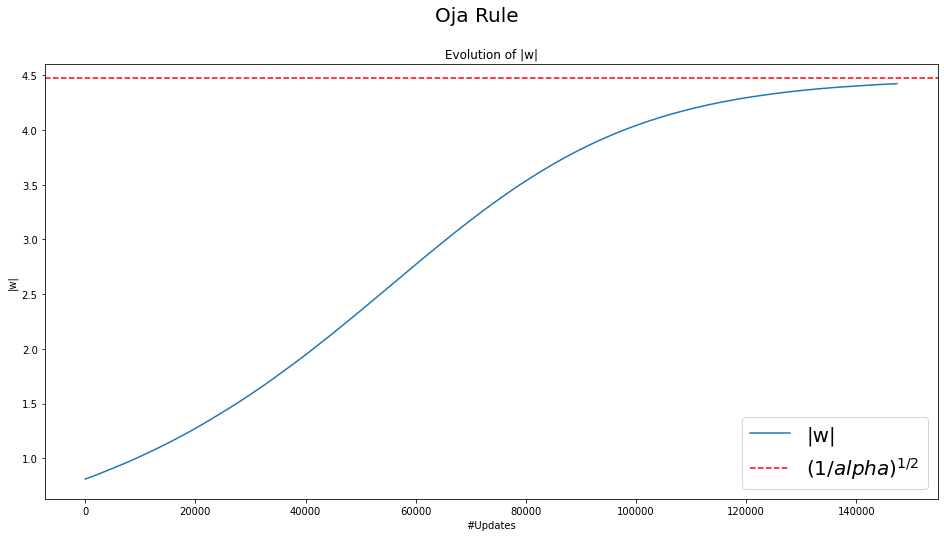

In [129]:
#plot P2
w1 = (np.transpose(w_hist))[0]
w2 = (np.transpose(w_hist))[1]
w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))

plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)
plt.title('Evolution of w components')
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
plt.xlabel('#Updates')
plt.legend(fontsize="20")

plt.savefig('P2' + name + '_w_evolution',format='pdf')

plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)
plt.title('Evolution of |w|')
plt.ylabel('|w|')
plt.xlabel('#Updates')
plt.plot(t, w_norm, label='|w|')
plt.axhline(np.sqrt(1/alpha), color = 'r', linestyle = 'dashed', label= "$(1/alpha)^{1/2}$")

plt.legend(fontsize="20")

plt.savefig('P2' + name + '_w_norm_evolution',format='pdf')


plt.show()

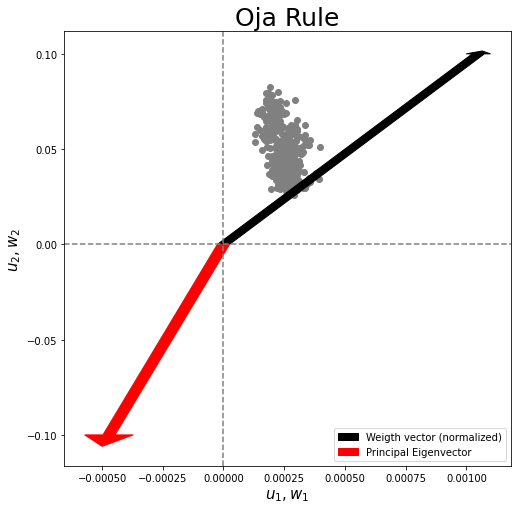

In [130]:
#P1
plt.figure(figsize=(8, 8))
plt.title(name, fontsize = 25)
#plot x,y axis
plt.axhline(y=0, color='grey', linestyle = '--')
plt.axvline(x=0, color='grey', linestyle = '--')

#plot inputs
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]
plt.scatter(u1,u2, color= 'grey')

#normalized weigth vector
plt.arrow(0,0, 0.1*w[0]/np.linalg.norm(w), 0.1*w[1]/np.linalg.norm(w) , width=0.00005, head_width=0.0001, head_length=0.0015, label='Weigth vector (normalized)', color = 'black')

#principal eigenvector
plt.arrow(0,0, max_eigvect[0]/10, max_eigvect[1]/10 , width=0.00005, head_width=0.0002, head_length=0.006, label='Principal Eigenvector', color = 'red')
plt.xlabel('$u_1, w_1$', fontsize=15)
plt.ylabel('$u_2, w_2$', fontsize=15)
plt.legend()

plt.savefig('P1' + name,format='pdf')
plt.show()

# Assignment 3
## Subtractive Normalization Rule

In [131]:
# Implement Subtractive Normalization Rule
name = 'Subtractive Normalization'
#randomly initialized wheight vector, from a uniform distribution [-1,1]
w = np.random.rand(2)*2 - 1 

#parameters
eta = 0.01
threshold = 1e-3
epochs = 1000

#to keep track of evolution of w during training
w_hist = w
wold = w

Nu = len(u[0])
n = np.ones(Nu)

for N in range (epochs):

    if N % (epochs/10) == 0:
        print(f"Epoch {N} of {epochs}")

    #shuffle the input dataset
    uu = np.random.permutation(u)  

    for i in range (len(uu)):
        #Compute output
        v = linear_model(uu[i], w)
        #Subtractive Normalization Rule
        w = w + eta*v*uu[i] - eta*(v*np.dot(n,uu[i])*n)/Nu

        w_hist = np.vstack((w_hist, w))
    
    #stop learning if w stabilizes
    if np.linalg.norm(w-wold) < threshold:
        print(f"Stopped at epoch {N} because of w convergence")
        break
    #to prevent overflow:
    if np.linalg.norm(w) > 1e50:
       print(f"Stopped at epoch {N} to prevent overflow")
       break
    wold = w

print('Training finished')

Epoch 0 of 1000
Epoch 100 of 1000
Epoch 200 of 1000
Epoch 300 of 1000
Epoch 400 of 1000
Epoch 500 of 1000
Epoch 600 of 1000
Epoch 700 of 1000
Epoch 800 of 1000
Epoch 900 of 1000
Training finished


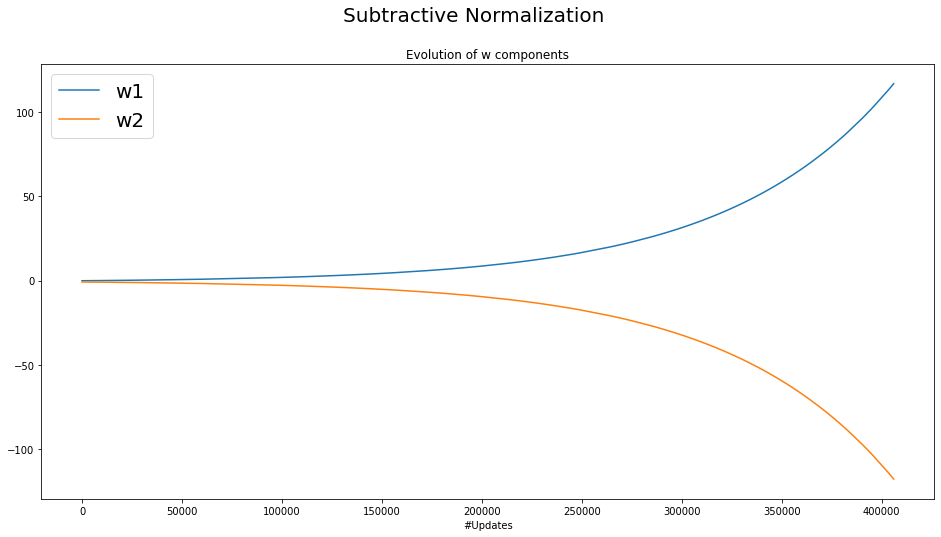

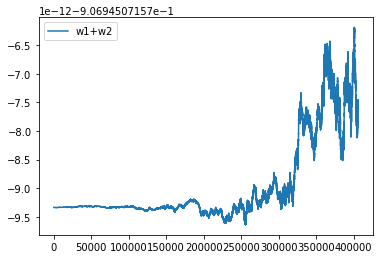

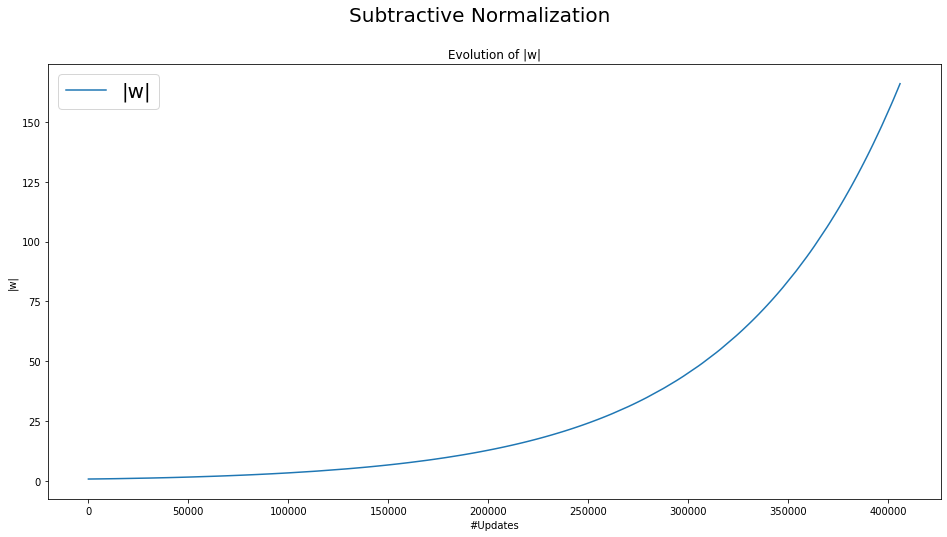

In [132]:
#plot P2
w1 = (np.transpose(w_hist))[0]
w2 = (np.transpose(w_hist))[1]
w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))

plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)
plt.title('Evolution of w components')
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
plt.xlabel('#Updates')
plt.legend(fontsize="20")

plt.savefig('P2' + name + '_w_evolution',format='pdf')

plt.figure()
plt.plot(t,w1+w2, label='w1+w2')
plt.legend()

plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)
plt.title('Evolution of |w|')
plt.ylabel('|w|')
plt.xlabel('#Updates')
plt.plot(t, w_norm, label='|w|')

plt.legend(fontsize="20")

plt.savefig('P2' + name + '_w_norm_evolution',format='pdf')


plt.show()

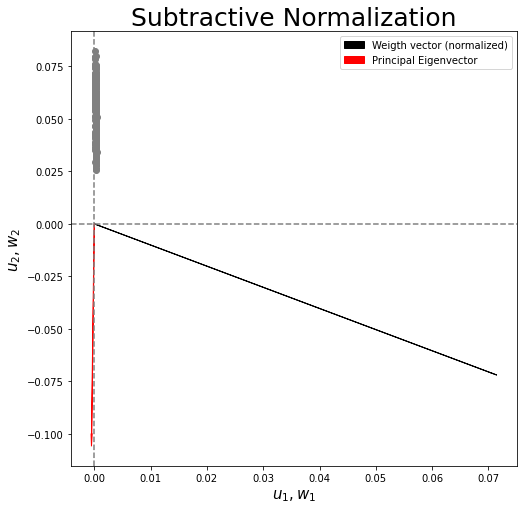

In [133]:
#P1
plt.figure(figsize=(8, 8))
plt.title(name, fontsize = 25)
#plot x,y axis
plt.axhline(y=0, color='grey', linestyle = '--')
plt.axvline(x=0, color='grey', linestyle = '--')

#plot inputs
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]
plt.scatter(u1,u2, color= 'grey')

#normalized weigth vector
plt.arrow(0,0, 0.1*w[0]/np.linalg.norm(w), 0.1*w[1]/np.linalg.norm(w) , width=0.00005, head_width=0.0001, head_length=0.0015, label='Weigth vector (normalized)', color = 'black')

#principal eigenvector
plt.arrow(0,0, max_eigvect[0]/10, max_eigvect[1]/10 , width=0.00005, head_width=0.0002, head_length=0.006, label='Principal Eigenvector', color = 'red')
plt.xlabel('$u_1, w_1$', fontsize=15)
plt.ylabel('$u_2, w_2$', fontsize=15)
plt.legend()

plt.savefig('P1' + name,format='pdf')
plt.show()